ur3.csv is the data for design 3 after cleaning(the one we cleaned two weeks ago) </br>
You need to upload ur3.csv first to run the code

In [2]:
import pandas as pd
#be sure to put the right filename here
ur3 = pd.read_csv('design_1_clean.csv', header=[0, 1])

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# Using 30% testing data
C_test = ur3

In [5]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels as sm #this has its own sub-library called sm.stats

# Yuya's code, adapted by Xin to fit our MTurk cleaned data

In [6]:
# Yuya's code, but changed a bit to fit our data with two headers
def build_plot(ax, data: pd.DataFrame, factor: str, factor_levels: np.ndarray, y: str,
    name: str, title: str, max_plot_val=1.0, boxplot=False, old_exp=[], min_plot_val=0.0):
    '''
    Builds a plot of the effect of the factor on y
    Parameters
    ----------
    ax: an axes object in matplotlib
    data (pandas.DataFrame): df containing data of the experiment.
    factor (str): the name of the independent variable.
    factor_levels (numpy.ndarray): the list of levels of factor.
    y (str): the name of the dependent variable.
    name (str): the version of the experiment.
    title (str): the title of this axes.
    max_plot_val (float): the maximum value of the plot. 
    boxplot (bool): True if you want to use boxplots. False if you want bar graphs.
    old_exp (list): the list of experiments that do not have any non-binary factors.
    '''
    # Create Arrays for the plot
    mean_outcomes = []
    se_outcomes = []
    num_students = []
    groups = factor_levels
    base_data = data # reference level
    for i in range(1, len(factor_levels)):
        base_data = base_data[base_data[factor + '_' + factor_levels[i]].iloc[:,0] == 0]
        assigned = data[
            data[factor + '_' + factor_levels[i]].iloc[:,0] == 1]
        num_students.append(len(assigned))
        if boxplot: # a boxplot requires a 2D array
            mean_outcomes.append(assigned[y].iloc[:,0])
        else:
            mean_outcomes.append(np.mean(assigned[y].iloc[:,0]))
            se_outcomes.append(stats.sem(assigned[y].iloc[:,0]))

    num_students.insert(0, len(base_data))
    if boxplot: # a boxplot requires a 2D array
        mean_outcomes.insert(0, base_data[y].iloc[:,0])
    else:
        mean_outcomes.insert(0, np.mean(base_data[y].iloc[:,0]))
        se_outcomes.insert(0, stats.sem(base_data[y].iloc[:,0]))                
    if name in old_exp: # factors with two levels
        groups = ['no', 'yes']
        mean_outcomes = mean_outcomes[:2]
        num_students = num_students[:2]
        if not boxplot:
            se_outcomes = se_outcomes[:2]
            
    x_pos = np.arange(len(groups))

    # Build the plot
    if boxplot:
        ax.boxplot(mean_outcomes, labels=groups, whis=2.0)
    else:
        ax.bar(x_pos, mean_outcomes, yerr=se_outcomes, align='center', 
            alpha=0.5, ecolor='black', capsize=20)
        ax.set_xticks(x_pos)
        ax.set_xticklabels(groups, fontsize = 12)
    # Add text in graphs (mean and sample size)
    for i in range(len(groups)):
        if boxplot:
            ax.text(i+1, 0.2*max_plot_val, 'Median =', ha='center', va='bottom',
                    fontweight='bold', fontsize = 16)
            ax.text(i+1, 0.15*max_plot_val, str(np.round(mean_outcomes[
                i].median(), 2)), ha='center', va='bottom', fontweight='bold', fontsize = 16)
            ax.text(i+1, 0.05*max_plot_val, 'n = %s' %num_students[
                i], ha='center', va='bottom', fontweight='bold', fontsize = 16)
        else:
            ax.text(i, 0.2*max_plot_val, 'Mean =', ha='center', va='bottom', fontweight='bold', 
                fontsize = 14)
            ax.text(i, 0.15*max_plot_val, str(np.round(
                mean_outcomes[i],2)), ha='center', va='bottom', fontweight='bold', 
                fontsize = 14)
            ax.text(i, 0.05*max_plot_val, 'n = %s' %num_students[
                i], ha='center', va='bottom', fontweight='bold', fontsize = 14)

    ax.set_title(title, fontsize = 16)
    ax.set_ylim(min_plot_val, max_plot_val)
    ax.yaxis.grid(True)

In [7]:
# Yuya's code (not changed)
def plot_main(data: pd.DataFrame, factors: np.ndarray, levels: np.ndarray, y: str, 
    ylabel: str, name: str, max_plot_val=1.0, boxplot=False, old_exp=[], min_plot_val=0.0):
    '''
    For each valid combination of independent (dummy) variables, plots interaction effects.
    Parameters
    ----------
    data (pandas.DataFrame): df containing data of the experiment.
    factors (numpy.ndarray): the list of the independent variables.
    levels (numpy.ndarray): the matrix of factor x level. Each raw represents a factor 
    and each element in a raw represents a level.
    y (str): the name of the dependent variable.
    ylabel (str): the description of the dependent variable that goes to a y-axis of a figure.
    name (str): the version of the experiment.
    max_plot_val (float): the maximum value of the plot. 
    boxplot (bool): True if you want to use boxplots. False if you want bar graphs.
    old_exp (list): the list of experiments that do not have any non-binary factors.
    '''
    
    for factor, factor_levels in zip(factors, levels):
        fig, ax = plt.subplots(figsize=(27, 10))
        try:
            build_plot(ax, data, factor, factor_levels, y, name, name.replace(
                '_', ' ').title(), max_plot_val, boxplot, old_exp, min_plot_val)
        except ValueError as e:
            print('Not enough data for ' + factor)
            continue
        ax.set_ylabel(ylabel, fontsize = 16)
        ax.set_xlabel(factor, fontsize = 16)

        # Save the figure and show
        plt.show()

## Plotting different version-catergories
0. Positive activities messages that prompt you to plan or engage in enjoyable activities.

1. Gratitude messages that prompt you to reflect on things you are
grateful for, or to express gratitude.

2. Self-care messages that prompt you to take good care of yourself, indulge yourself, or be kind and compassionate to yourself.

3. Positive thinking messages that help you to focus on positive aspects of your life.

4. Relaxation messages that help you calm down or gain a sense of wellbeing through exercises such as stretching, breathing, or mindfulness.

5. Thought challenging messages that help you to identify unhelpful patterns of thinking and find new ways of thinking about things.

6. Inspirational messages that convey hope and build excitement about possibilities to come.

7. Problem solving messages that help you make and carry out plans for achieving goals.

8. Relationship messages that help you resolve conflicts and build stronger bonds with others in your life.

9. Affirmation messages that help you identify and acknowledge your strengths, abilities, and worth.

10. Reassuring messages that remind you that facing challenges is normal, and that things are going to be okay or that they are not so bad as they might seem.


In [8]:
categories = ['Positive Activites', 'Gratude', 'Self-Care', 'Positive Thinking', 'Relaxation', 'Thought Challenging', 'Inspirational', 'Problem Solving', 'Relationships', 'Affirmation', 'Reassuring']
len(categories)

11

# Order Effects
If you want to plot the order effects of different messages: 1,2,3,4,5

However we'e not super interested in this because of the lack of data points.

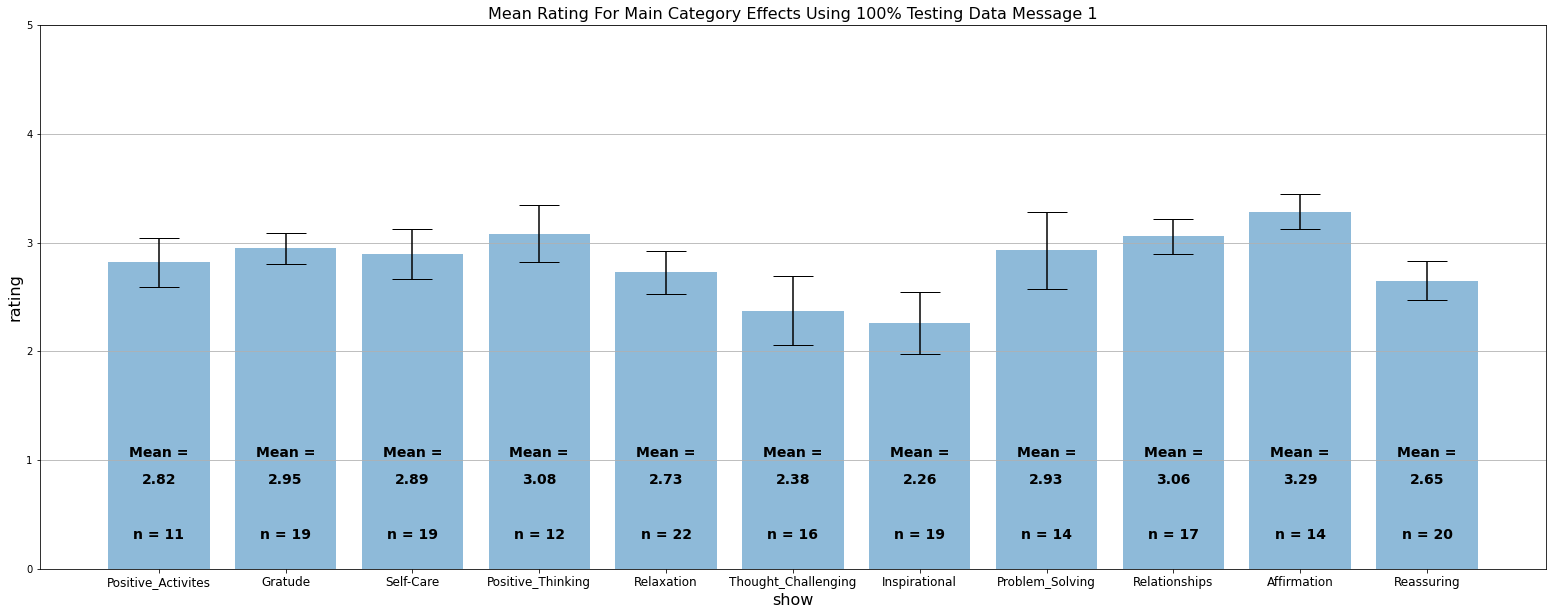

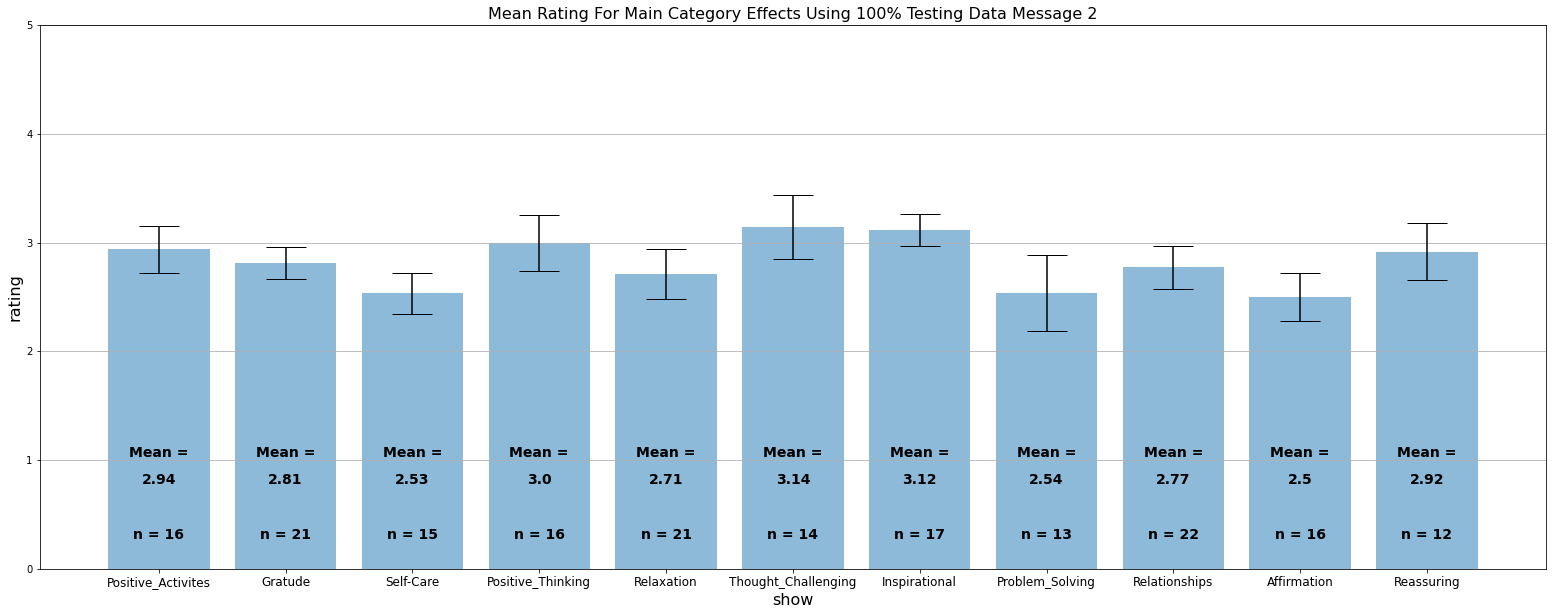

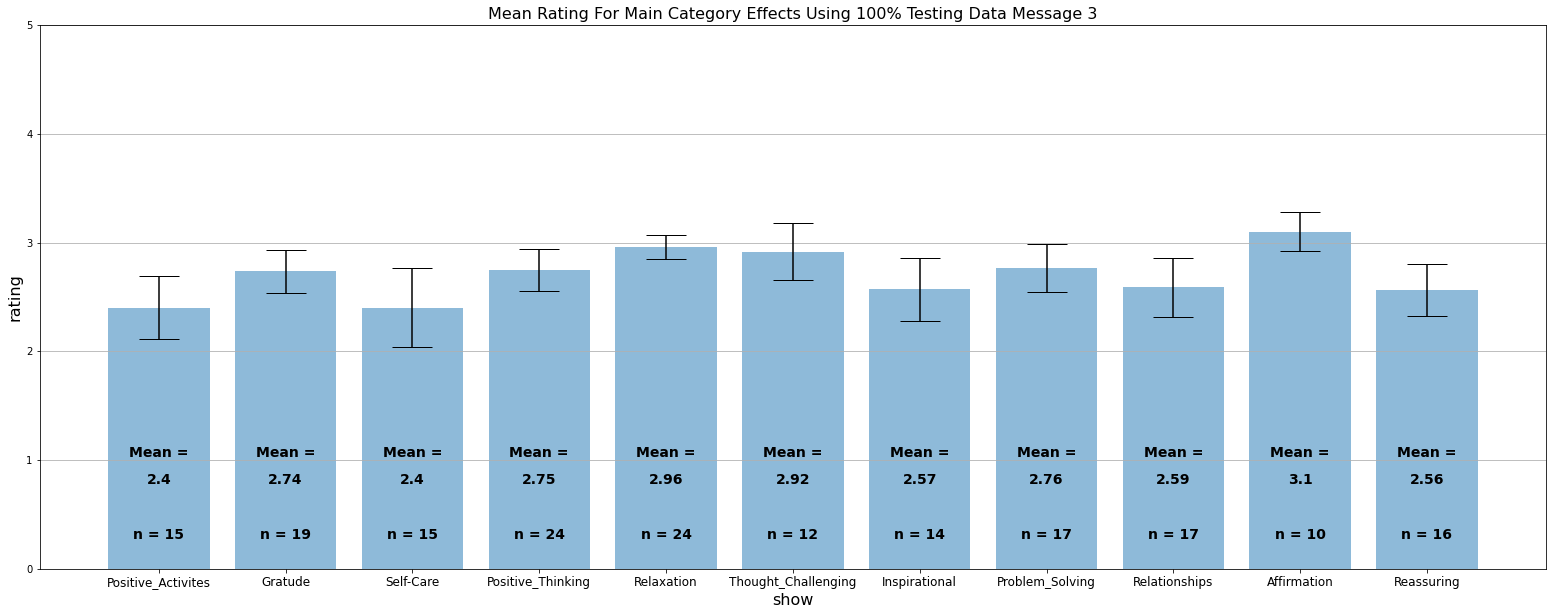

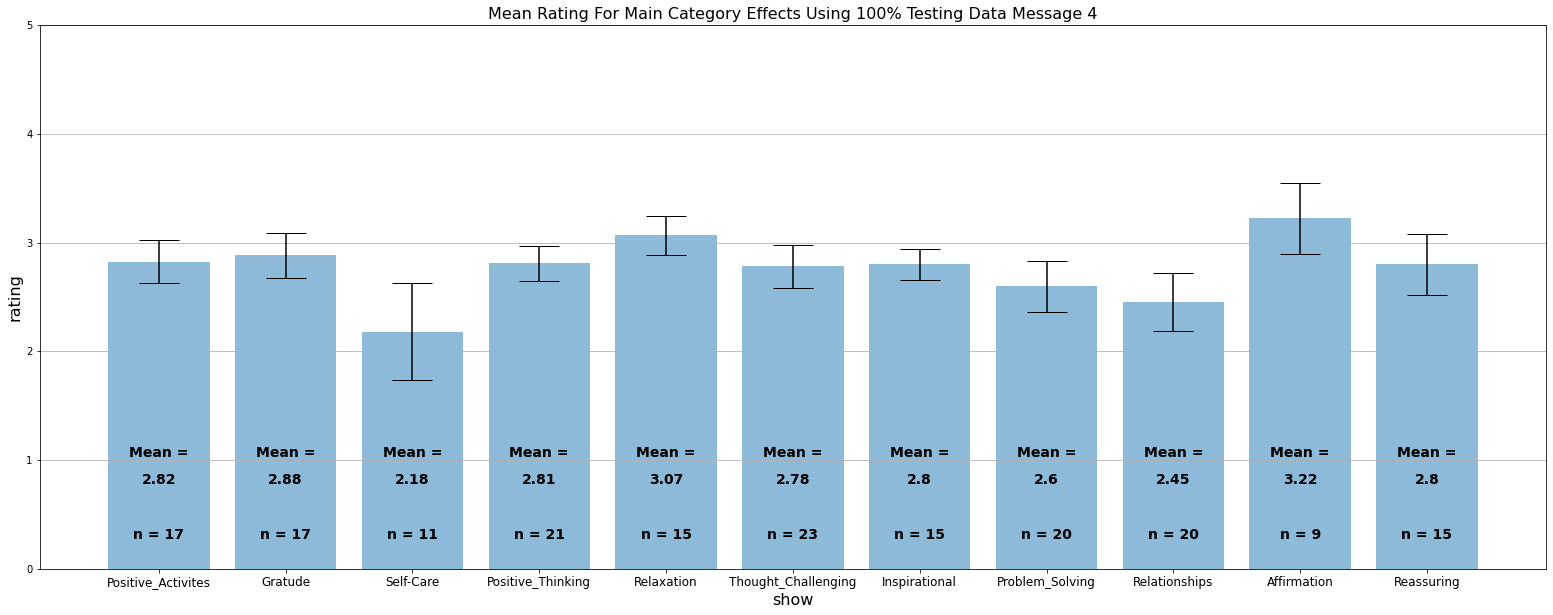

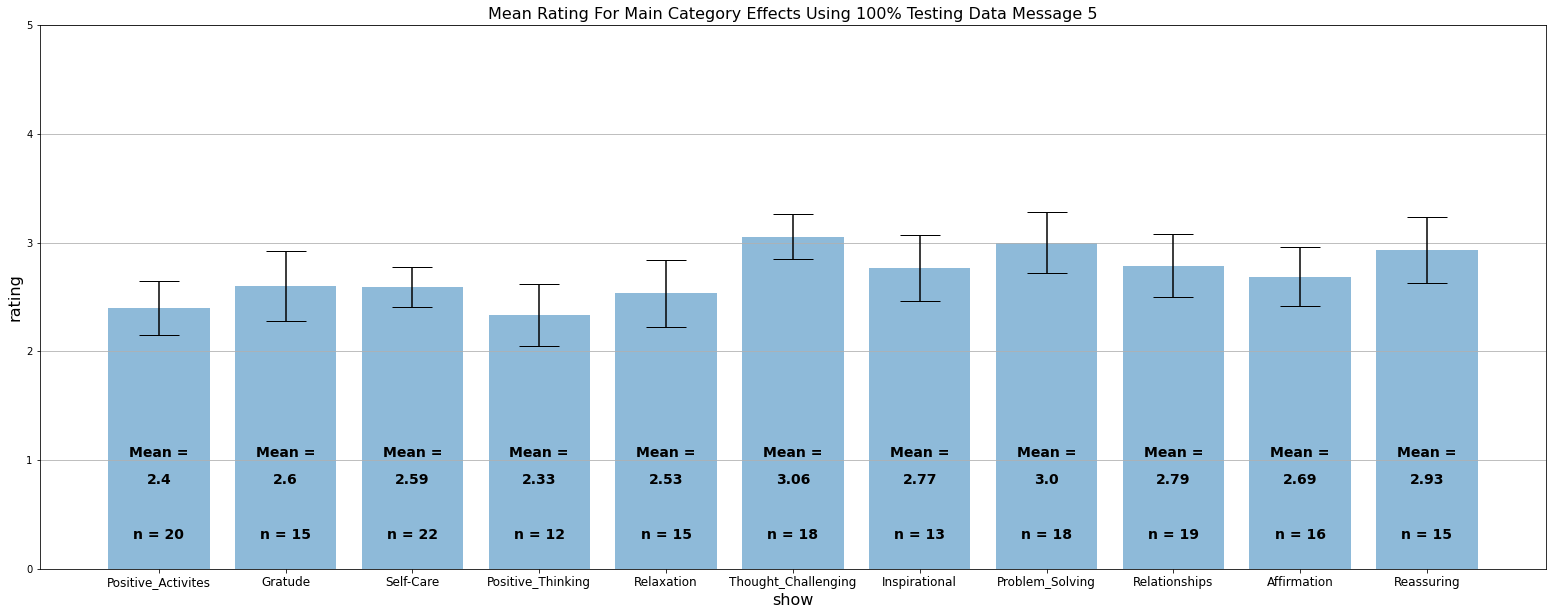

In [9]:
# Create new column show_cat1
i = 1
versions = [C_test['version_id1', 'version_id1'], C_test['version_id2', 'version_id2'], C_test['version_id3', 'version_id3'], C_test['version_id4', 'version_id4'], C_test['version_id5', 'version_id5']]
for version in versions:
  C_test['show_Gratude', 'show_Gratude'] = ((version >= 5220) & (version < 5227)).astype(int)
  C_test['show_Self-Care', 'show_Self-Care'] = ((version >= 5227) & (version < 5234)).astype(int)
  C_test['show_Positive_Thinking', 'show_Positive_Thinking'] = ((version >= 5234) & (version < 5241)).astype(int)
  C_test['show_Relaxation', 'show_Relaxation'] = ((version >= 5241) & (version < 5248)).astype(int)
  C_test['show_Thought_Challenging', 'show_Thought_Challenging'] = ((version >= 5248) & (version < 5255)).astype(int)
  C_test['show_Inspirational', 'show_Inspirational'] = ((version >= 5255) & (version < 5262)).astype(int)
  C_test['show_Problem_Solving', 'show_Problem_Solving'] = ((version >= 5262) & (version < 5269)).astype(int)
  C_test['show_Relationships', 'show_Relationships'] = ((version >= 5269) & (version < 5276)).astype(int)
  C_test['show_Affirmation', 'show_Affirmation'] = ((version >= 5276) & (version < 5283)).astype(int)
  C_test['show_Reassuring', 'show_Reassuring'] = ((version >= 5283) & (version < 5290)).astype(int)
  C_test['show_Positive_Activites', 'show_Positive_Activites'] = ((version >= 5290) & (version < 5297) | (version == 5218)).astype(int)

  # plot main effect for design 3
  plot_main(C_test, np.array(['show']),
            np.array([['Positive_Activites', 'Gratude', 'Self-Care', 'Positive_Thinking', 'Relaxation', 'Thought_Challenging',
                      'Inspirational', 'Problem_Solving', 'Relationships', 'Affirmation', 'Reassuring']]), 'reward_'+str(i),
            'rating', 'Mean Rating for main category effects using 100% Testing Data Message ' + str(i),max_plot_val=5,boxplot=False,old_exp=[],
          min_plot_val=0)
  i+=1

#   # Order Effects Proper
# i = 1
# versions = [C_test['version_id1', 'version_id1'], C_test['version_id2', 'version_id2'], C_test['version_id3', 'version_id3'], C_test['version_id4', 'version_id4'], C_test['version_id5', 'version_id5']]
# for version in versions:
#   testy['show_Gratude', 'show_Gratude'] = ((version >= 5220) & (version < 5227)).astype(int)
#   testy['show_Self-Care', 'show_Self-Care'] = ((version >= 5227) & (version < 5234)).astype(int)
#   testy['show_Positive_Thinking', 'show_Positive_Thinking'] = ((version >= 5234) & (version < 5241)).astype(int)
#   testy['show_Relaxation', 'show_Relaxation'] = ((version >= 5241) & (version < 5248)).astype(int)
#   testy['show_Thought_Challenging', 'show_Thought_Challenging'] = ((version >= 5248) & (version < 5255)).astype(int)
#   testy['show_Inspirational', 'show_Inspirational'] = ((version >= 5255) & (version < 5262)).astype(int)
#   testy['show_Problem_Solving', 'show_Problem_Solving'] = ((version >= 5262) & (version < 5269)).astype(int)
#   testy['show_Relationships', 'show_Relationships'] = ((version >= 5269) & (version < 5276)).astype(int)
#   testy['show_Affirmation', 'show_Affirmation'] = ((version >= 5276) & (version < 5283)).astype(int)
#   testy['show_Reassuring', 'show_Reassuring'] = ((version >= 5283) & (version < 5290)).astype(int)
#   testy['show_Positive_Activites', 'show_Positive_Activites'] = ((version >= 5290) & (version < 5297) | (version == 5218)).astype(int)

#   # plot main effect for design 3
#   plot_main(testy, np.array(['show']),
#            np.array([['Positive_Activites', 'Gratude', 'Self-Care', 'Positive_Thinking', 'Relaxation', 'Thought_Challenging',
#                       'Inspirational', 'Problem_Solving', 'Relationships', 'Affirmation', 'Reassuring']]), 'reward_design1',
#            'rating', 'Mean Rating for main category effects using 100% Testing Data Version ' + str(i),max_plot_val=5,boxplot=False,old_exp=[], min_plot_val=0)

#   i+=1

In [10]:
C_test.shape

(183, 221)

In [11]:
C_test.head(20)

,Unnamed: 0_level_0,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,message_1,version_id1,policy_id1,policy1,message_2,version_id2,policy_id2,policy2,message_3,version_id3,policy_id3,policy3,message_4,version_id4,policy_id4,policy4,message_5,version_id5,policy_id5,policy5,A_1,A_2,B_1,B_2,B_3,A.d,B.d,showA_2,...,race_TEXT,education,postal_codee,student,meds,therapy,apps,describe_apps,text_service,describe_text_servic,importance_MH_5,interest_1,no_interest,debrief,donate,phone.number,feedback,study_about,exclude,code,DO-BR-FL_57,DO-BR-FL_28,DO-BR-FL_39,DO-Q-study_about,LocationLatitude,LocationLongitude,LocationAccuracy,Unnamed: 206_level_0,IPCountry,show_Gratude,show_Self-Care,show_Positive_Thinking,show_Relaxation,show_Thought_Challenging,show_Inspirational,show_Problem_Solving,show_Relationships,show_Affirmation,show_Reassuring,show_Positive_Activites
,Unnamed: 0_level_1,Unnamed: 1_level_1,ResponseID,ResponseSet,Name,ExternalDataReference,EmailAddress,IPAddress,Status,StartDate,EndDate,Finished,message_1,version_id1,policy_id1,policy1,message_2,version_id2,policy_id2,policy2,message_3,version_id3,policy_id3,policy3,message_4,version_id4,policy_id4,policy4,message_5,version_id5,policy_id5,policy5,A_1,A_2,B_1,B_2,B_3,A.d,B.d,showA_2,...,What is your race?-TEXT,What is the highest level of education you have completed?,Please enter your postal/zip code.,Are you currently a student?,Have you ever taken a prescribed anti-depressant medication?,"Have you ever seen a therapist, counselor, or psychiatrist in order to talk about your mental hea...",Do you have any apps on your phone that you use to manage your mental health or wellbeing?,Please describe any apps you use related to your mental health:,Have you ever signed up for an automated text messaging program to help manage your mental health...,What automated text messaging program did you use?,"At this moment, how important is it that you take steps to better manage your mental health conce...-&nbsp;","On the scale below, how interested would you be in signing up for an automated texting program, w...-&nbsp;",It sounds like you aren't particularly interested in an automated texting program. That's complet...,Thank you for participating in this study. The experiment in which you just participated is in th...,"If we tried to make this activity a generally accessible service, how much (in dollars) would you...",If you are interested in using our text messaging system (free of charge) once it is ready to be...,"We welcome any feedback that you have about this study. In the box below, please feel free to com...",What was this study about?,"Lastly, please answer this final question honestly. You will receive compensation no matter how y...","Thank you. In order to be compensated, please enter the 6-digit code into MTurk: Secret Completi...",Display Order: Block Randomizer FL_57,Display Order: Block Randomizer FL_28,Display Order: Block Randomizer FL_39,Display Order: What was this study about?,LocationLatitude,LocationLongitude,LocationAccuracy,Unnamed: 206_level_1,country,show_Gratude,show_Self-Care,show_Positive_Thinking,show_Relaxation,show_Thought_Challenging,show_Inspirational,show_Problem_Solving,show_Relationships,show_Affirmation,show_Reassuring,show_Positive_Activites
0,15,1,NaN,Default Response Set,Anonymous,NaN,NaN,NaN,0,2020-07-24 10:59:23,2020-07-24 11:01:40,1,Stop what you are doing and listen to your fav...,5294.0,1.0,uniform_random,Try looking at your thoughts from the outside ...,5245.0,1.0,uniform_random,"Instead of looking at it so negatively, think ...",5239.0,1.0,uniform_random,"Remember: ""This too shall pass.""",5287.0,1.0,uniform_random,It's okay to not be okay.,5286.0,1.0,uniform_random,Think about what you're grateful for this week.,What are you grateful for this week?,NaN,Gratitude for even tiny things can make us hap...,Do you see how gratitude for even tiny things ...,What are you grateful for this week?,NaN,1.0,...,NaN,5.0,NaN,2.0,1.0,2.0,2.0,NaN,2.0,NaN,67.0,79.0,NaN,

In [12]:
test1 = C_test.copy()
test2 = C_test.copy()
test3 = C_test.copy()
test4 = C_test.copy()
test5 = C_test.copy()
tests = [test1, test2, test3, test4, test5]

In [13]:
j = 1
for test in tests:
  test['reward_design1', 'reward_design1'] = test.apply(lambda x: x['reward_' + str(j)], axis=1)
  j+=1

In [14]:

i = 1
for test in tests:
  test['version_id_design_1', 'version_id_design_1'] = test.apply(lambda x: x['version_id' + str(i)], axis=1)
  i+=1

In [15]:
test1.head()

,Unnamed: 0_level_0,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,message_1,version_id1,policy_id1,policy1,message_2,version_id2,policy_id2,policy2,message_3,version_id3,policy_id3,policy3,message_4,version_id4,policy_id4,policy4,message_5,version_id5,policy_id5,policy5,A_1,A_2,B_1,B_2,B_3,A.d,B.d,showA_2,...,postal_codee,student,meds,therapy,apps,describe_apps,text_service,describe_text_servic,importance_MH_5,interest_1,no_interest,debrief,donate,phone.number,feedback,study_about,exclude,code,DO-BR-FL_57,DO-BR-FL_28,DO-BR-FL_39,DO-Q-study_about,LocationLatitude,LocationLongitude,LocationAccuracy,Unnamed: 206_level_0,IPCountry,show_Gratude,show_Self-Care,show_Positive_Thinking,show_Relaxation,show_Thought_Challenging,show_Inspirational,show_Problem_Solving,show_Relationships,show_Affirmation,show_Reassuring,show_Positive_Activites,reward_design1,version_id_design_1
,Unnamed: 0_level_1,Unnamed: 1_level_1,ResponseID,ResponseSet,Name,ExternalDataReference,EmailAddress,IPAddress,Status,StartDate,EndDate,Finished,message_1,version_id1,policy_id1,policy1,message_2,version_id2,policy_id2,policy2,message_3,version_id3,policy_id3,policy3,message_4,version_id4,policy_id4,policy4,message_5,version_id5,policy_id5,policy5,A_1,A_2,B_1,B_2,B_3,A.d,B.d,showA_2,...,Please enter your postal/zip code.,Are you currently a student?,Have you ever taken a prescribed anti-depressant medication?,"Have you ever seen a therapist, counselor, or psychiatrist in order to talk about your mental hea...",Do you have any apps on your phone that you use to manage your mental health or wellbeing?,Please describe any apps you use related to your mental health:,Have you ever signed up for an automated text messaging program to help manage your mental health...,What automated text messaging program did you use?,"At this moment, how important is it that you take steps to better manage your mental health conce...-&nbsp;","On the scale below, how interested would you be in signing up for an automated texting program, w...-&nbsp;",It sounds like you aren't particularly interested in an automated texting program. That's complet...,Thank you for participating in this study. The experiment in which you just participated is in th...,"If we tried to make this activity a generally accessible service, how much (in dollars) would you...",If you are interested in using our text messaging system (free of charge) once it is ready to be...,"We welcome any feedback that you have about this study. In the box below, please feel free to com...",What was this study about?,"Lastly, please answer this final question honestly. You will receive compensation no matter how y...","Thank you. In order to be compensated, please enter the 6-digit code into MTurk: Secret Completi...",Display Order: Block Randomizer FL_57,Display Order: Block Randomizer FL_28,Display Order: Block Randomizer FL_39,Display Order: What was this study about?,LocationLatitude,LocationLongitude,LocationAccuracy,Unnamed: 206_level_1,country,show_Gratude,show_Self-Care,show_Positive_Thinking,show_Relaxation,show_Thought_Challenging,show_Inspirational,show_Problem_Solving,show_Relationships,show_Affirmation,show_Reassuring,show_Positive_Activites,reward_design1,version_id_design_1
0,15,1,NaN,Default Response Set,Anonymous,NaN,NaN,NaN,0,2020-07-24 10:59:23,2020-07-24 11:01:40,1,Stop what you are doing and listen to your fav...,5294.0,1.0,uniform_random,Try looking at your thoughts from the outside ...,5245.0,1.0,uniform_random,"Instead of looking at it so negatively, think ...",5239.0,1.0,uniform_random,"Remember: ""This too shall pass.""",5287.0,1.0,uniform_random,It's okay to not be okay.,5286.0,1.0,uniform_random,Think about what you're grateful for this week.,What are you grateful for this week?,NaN,Gratitude for even tiny things can make us hap...,Do you see how gratitude for even tiny things ...,What are you grateful for this week?,NaN,1.0,...,NaN,2.0,1.0,2.0,2.0,NaN,2.0,NaN,67.0,79.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,FL_55|FL_54|F

In [16]:
test2.head()

,Unnamed: 0_level_0,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,message_1,version_id1,policy_id1,policy1,message_2,version_id2,policy_id2,policy2,message_3,version_id3,policy_id3,policy3,message_4,version_id4,policy_id4,policy4,message_5,version_id5,policy_id5,policy5,A_1,A_2,B_1,B_2,B_3,A.d,B.d,showA_2,...,postal_codee,student,meds,therapy,apps,describe_apps,text_service,describe_text_servic,importance_MH_5,interest_1,no_interest,debrief,donate,phone.number,feedback,study_about,exclude,code,DO-BR-FL_57,DO-BR-FL_28,DO-BR-FL_39,DO-Q-study_about,LocationLatitude,LocationLongitude,LocationAccuracy,Unnamed: 206_level_0,IPCountry,show_Gratude,show_Self-Care,show_Positive_Thinking,show_Relaxation,show_Thought_Challenging,show_Inspirational,show_Problem_Solving,show_Relationships,show_Affirmation,show_Reassuring,show_Positive_Activites,reward_design1,version_id_design_1
,Unnamed: 0_level_1,Unnamed: 1_level_1,ResponseID,ResponseSet,Name,ExternalDataReference,EmailAddress,IPAddress,Status,StartDate,EndDate,Finished,message_1,version_id1,policy_id1,policy1,message_2,version_id2,policy_id2,policy2,message_3,version_id3,policy_id3,policy3,message_4,version_id4,policy_id4,policy4,message_5,version_id5,policy_id5,policy5,A_1,A_2,B_1,B_2,B_3,A.d,B.d,showA_2,...,Please enter your postal/zip code.,Are you currently a student?,Have you ever taken a prescribed anti-depressant medication?,"Have you ever seen a therapist, counselor, or psychiatrist in order to talk about your mental hea...",Do you have any apps on your phone that you use to manage your mental health or wellbeing?,Please describe any apps you use related to your mental health:,Have you ever signed up for an automated text messaging program to help manage your mental health...,What automated text messaging program did you use?,"At this moment, how important is it that you take steps to better manage your mental health conce...-&nbsp;","On the scale below, how interested would you be in signing up for an automated texting program, w...-&nbsp;",It sounds like you aren't particularly interested in an automated texting program. That's complet...,Thank you for participating in this study. The experiment in which you just participated is in th...,"If we tried to make this activity a generally accessible service, how much (in dollars) would you...",If you are interested in using our text messaging system (free of charge) once it is ready to be...,"We welcome any feedback that you have about this study. In the box below, please feel free to com...",What was this study about?,"Lastly, please answer this final question honestly. You will receive compensation no matter how y...","Thank you. In order to be compensated, please enter the 6-digit code into MTurk: Secret Completi...",Display Order: Block Randomizer FL_57,Display Order: Block Randomizer FL_28,Display Order: Block Randomizer FL_39,Display Order: What was this study about?,LocationLatitude,LocationLongitude,LocationAccuracy,Unnamed: 206_level_1,country,show_Gratude,show_Self-Care,show_Positive_Thinking,show_Relaxation,show_Thought_Challenging,show_Inspirational,show_Problem_Solving,show_Relationships,show_Affirmation,show_Reassuring,show_Positive_Activites,reward_design1,version_id_design_1
0,15,1,NaN,Default Response Set,Anonymous,NaN,NaN,NaN,0,2020-07-24 10:59:23,2020-07-24 11:01:40,1,Stop what you are doing and listen to your fav...,5294.0,1.0,uniform_random,Try looking at your thoughts from the outside ...,5245.0,1.0,uniform_random,"Instead of looking at it so negatively, think ...",5239.0,1.0,uniform_random,"Remember: ""This too shall pass.""",5287.0,1.0,uniform_random,It's okay to not be okay.,5286.0,1.0,uniform_random,Think about what you're grateful for this week.,What are you grateful for this week?,NaN,Gratitude for even tiny things can make us hap...,Do you see how gratitude for even tiny things ...,What are you grateful for this week?,NaN,1.0,...,NaN,2.0,1.0,2.0,2.0,NaN,2.0,NaN,67.0,79.0,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,FL_55|FL_54|F

In [17]:
testy = pd.concat(tests)

In [18]:
testy.shape

(915, 223)

In [19]:
testy.columns

MultiIndex([(      'Unnamed: 0_level_0',       'Unnamed: 0_level_1'),
            (                      'ID',       'Unnamed: 1_level_1'),
            (                      'V1',               'ResponseID'),
            (                      'V2',              'ResponseSet'),
            (                      'V3',                     'Name'),
            (                      'V4',    'ExternalDataReference'),
            (                      'V5',             'EmailAddress'),
            (                      'V6',                'IPAddress'),
            (                      'V7',                   'Status'),
            (                      'V8',                'StartDate'),
            ...
            (         'show_Relaxation',          'show_Relaxation'),
            ('show_Thought_Challenging', 'show_Thought_Challenging'),
            (      'show_Inspirational',       'show_Inspirational'),
            (    'show_Problem_Solving',     'show_Problem_Solving'),
    

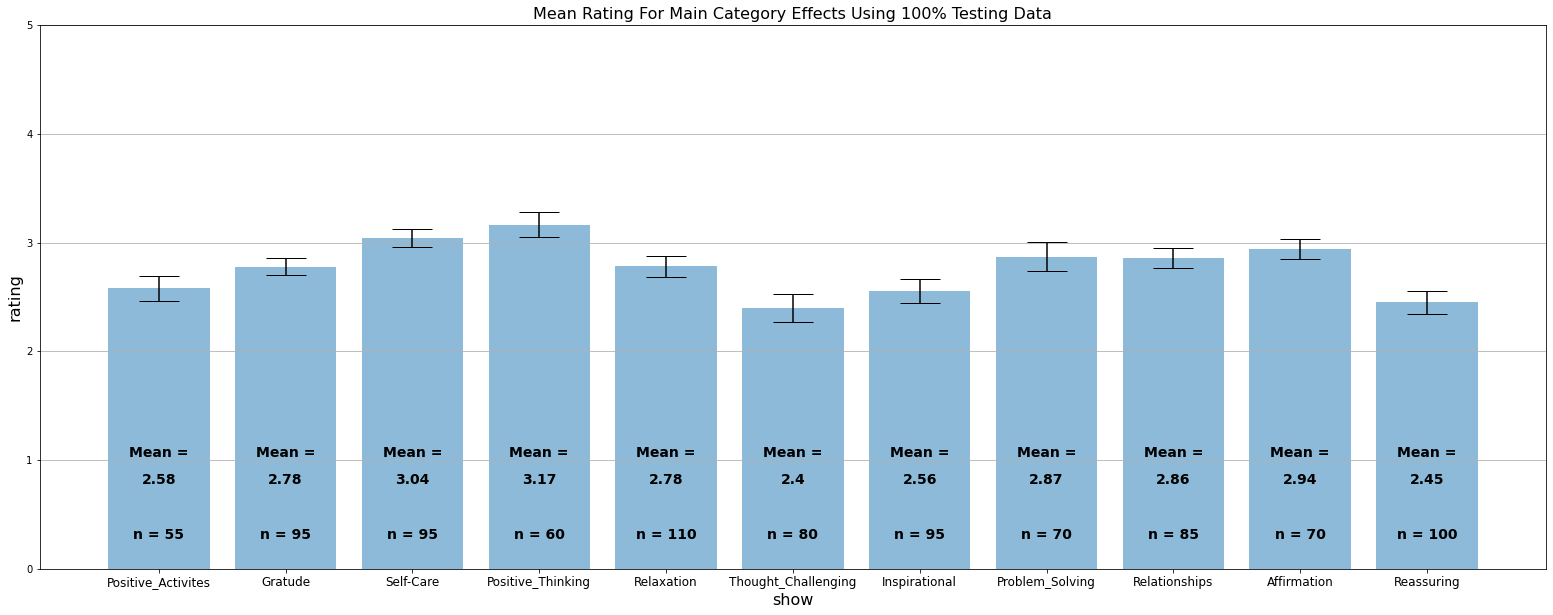

In [20]:
version = testy['version_id1', 'version_id1']
testy['show_Gratude', 'show_Gratude'] = ((version >= 5220) & (version < 5227)).astype(int)
testy['show_Self-Care', 'show_Self-Care'] = ((version >= 5227) & (version < 5234)).astype(int)
testy['show_Positive_Thinking', 'show_Positive_Thinking'] = ((version >= 5234) & (version < 5241)).astype(int)
testy['show_Relaxation', 'show_Relaxation'] = ((version >= 5241) & (version < 5248)).astype(int)
testy['show_Thought_Challenging', 'show_Thought_Challenging'] = ((version >= 5248) & (version < 5255)).astype(int)
testy['show_Inspirational', 'show_Inspirational'] = ((version >= 5255) & (version < 5262)).astype(int)
testy['show_Problem_Solving', 'show_Problem_Solving'] = ((version >= 5262) & (version < 5269)).astype(int)
testy['show_Relationships', 'show_Relationships'] = ((version >= 5269) & (version < 5276)).astype(int)
testy['show_Affirmation', 'show_Affirmation'] = ((version >= 5276) & (version < 5283)).astype(int)
testy['show_Reassuring', 'show_Reassuring'] = ((version >= 5283) & (version < 5290)).astype(int)
testy['show_Positive_Activites', 'show_Positive_Activites'] = ((version >= 5290) & (version < 5297) | (version == 5218)).astype(int)

# plot main effect for design 3
plot_main(testy, np.array(['show']),
           np.array([['Positive_Activites', 'Gratude', 'Self-Care', 'Positive_Thinking', 'Relaxation', 'Thought_Challenging',
                      'Inspirational', 'Problem_Solving', 'Relationships', 'Affirmation', 'Reassuring']]), 'reward_design1',
           'rating', 'Mean Rating for main category effects using 100% Testing Data',max_plot_val=5,boxplot=False,old_exp=[], min_plot_val=0)


In [21]:
# # Order Effects Proper
# i = 1
# versions = [C_test['version_id1', 'version_id1'], C_test['version_id2', 'version_id2'], C_test['version_id3', 'version_id3'], C_test['version_id4', 'version_id4'], C_test['version_id5', 'version_id5']]
# for version in versions:
#   testy['show_Gratude', 'show_Gratude'] = ((version >= 5220) & (version < 5227)).astype(int)
#   testy['show_Self-Care', 'show_Self-Care'] = ((version >= 5227) & (version < 5234)).astype(int)
#   testy['show_Positive_Thinking', 'show_Positive_Thinking'] = ((version >= 5234) & (version < 5241)).astype(int)
#   testy['show_Relaxation', 'show_Relaxation'] = ((version >= 5241) & (version < 5248)).astype(int)
#   testy['show_Thought_Challenging', 'show_Thought_Challenging'] = ((version >= 5248) & (version < 5255)).astype(int)
#   testy['show_Inspirational', 'show_Inspirational'] = ((version >= 5255) & (version < 5262)).astype(int)
#   testy['show_Problem_Solving', 'show_Problem_Solving'] = ((version >= 5262) & (version < 5269)).astype(int)
#   testy['show_Relationships', 'show_Relationships'] = ((version >= 5269) & (version < 5276)).astype(int)
#   testy['show_Affirmation', 'show_Affirmation'] = ((version >= 5276) & (version < 5283)).astype(int)
#   testy['show_Reassuring', 'show_Reassuring'] = ((version >= 5283) & (version < 5290)).astype(int)
#   testy['show_Positive_Activites', 'show_Positive_Activites'] = ((version >= 5290) & (version < 5297) | (version == 5218)).astype(int)

#   # plot main effect for design 3
#   plot_main(testy, np.array(['show']),
#            np.array([['Positive_Activites', 'Gratude', 'Self-Care', 'Positive_Thinking', 'Relaxation', 'Thought_Challenging',
#                       'Inspirational', 'Problem_Solving', 'Relationships', 'Affirmation', 'Reassuring']]), 'reward_design1',
#            'rating', 'Mean Rating for main category effects using 100% Testing Data Version ' + str(i),max_plot_val=5,boxplot=False,old_exp=[], min_plot_val=0)

#   i+=1

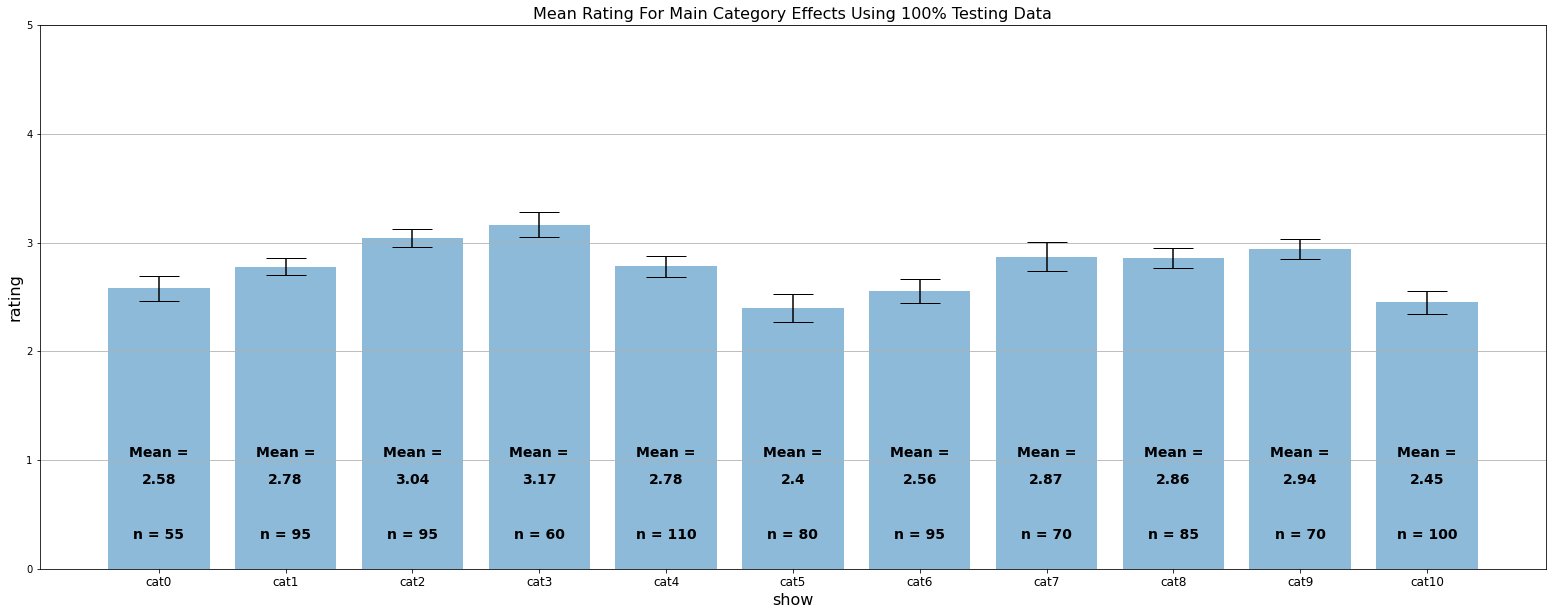

In [22]:
version = testy['version_id1', 'version_id1']
testy['show_cat1', 'show_cat1'] = ((version >= 5220) & (version < 5227)).astype(int)
testy['show_cat2', 'show_cat2'] = ((version >= 5227) & (version < 5234)).astype(int)
testy['show_cat3', 'show_cat3'] = ((version >= 5234) & (version < 5241)).astype(int)
testy['show_cat4', 'show_cat4'] = ((version >= 5241) & (version < 5248)).astype(int)
testy['show_cat5', 'show_cat5'] = ((version >= 5248) & (version < 5255)).astype(int)
testy['show_cat6', 'show_cat6'] = ((version >= 5255) & (version < 5262)).astype(int)
testy['show_cat7', 'show_cat7'] = ((version >= 5262) & (version < 5269)).astype(int)
testy['show_cat8', 'show_cat8'] = ((version >= 5269) & (version < 5276)).astype(int)
testy['show_cat9', 'show_cat9'] = ((version >= 5276) & (version < 5283)).astype(int)
testy['show_cat10', 'show_cat10'] = ((version >= 5283) & (version < 5290)).astype(int)
testy['show_cat0', 'show_cat0'] = ((version >= 5290) & (version < 5297) | (version == 5218)).astype(int)

# plot main effect for design 3
plot_main(testy, np.array(['show']),
           np.array([['cat0', 'cat1','cat2', 'cat3','cat4','cat5','cat6','cat7', 'cat8', 'cat9', 'cat10']]), 'reward_design1',
           'rating', 'Mean Rating for main category effects using 100% Testing Data',max_plot_val=5,boxplot=False,old_exp=[], min_plot_val=0)


## Setting up the Dependent Variable 'reward' for applying rigorous statistical tests.

In [23]:
from scipy import stats 

In [24]:
# Time to apply T-Test between each one of the categories. This is gonna be huge lmao because...
# Number of possible pairs for 11 categories: 11!/(2!(11-2)!) = 55 pairs. 
# So I'm going to automate that whole calculation a little bit. Please excuse the utter messiness of it. 

# get show_cat1 and show_cat2 reward rows
shown_cat1_reward = testy[testy[("show_cat1", "show_cat1")] == 1.0]['reward_design1'].iloc[:,0]
shown_cat2_reward = testy[testy[("show_cat2", "show_cat2")] == 1.0]['reward_design1'].iloc[:,0]
shown_cat3_reward = testy[testy[("show_cat3", "show_cat3")] == 1.0]['reward_design1'].iloc[:,0]
shown_cat4_reward = testy[testy[("show_cat4", "show_cat4")] == 1.0]['reward_design1'].iloc[:,0]
shown_cat5_reward = testy[testy[("show_cat5", "show_cat5")] == 1.0]['reward_design1'].iloc[:,0]
shown_cat6_reward = testy[testy[("show_cat6", "show_cat6")] == 1.0]['reward_design1'].iloc[:,0]
shown_cat7_reward = testy[testy[("show_cat7", "show_cat7")] == 1.0]['reward_design1'].iloc[:,0]
shown_cat8_reward = testy[testy[("show_cat8", "show_cat8")] == 1.0]['reward_design1'].iloc[:,0]
shown_cat9_reward = testy[testy[("show_cat9", "show_cat9")] == 1.0]['reward_design1'].iloc[:,0]
shown_cat10_reward = testy[testy[("show_cat10", "show_cat10")] == 1.0]['reward_design1'].iloc[:,0]
shown_cat0_reward = testy[testy[("show_cat0", "show_cat0")] == 1.0]['reward_design1'].iloc[:,0]

cat_rewards = [shown_cat0_reward, shown_cat1_reward, shown_cat2_reward, shown_cat3_reward, shown_cat4_reward, shown_cat5_reward, shown_cat6_reward, shown_cat7_reward,
             shown_cat8_reward, shown_cat9_reward, shown_cat10_reward]


# Ignoring Order Effects

Now we're going to combine responses from all the 5 messages and just ignore order effects. We're just interested in comparing message versions and version categories.


# Step 0: Family-Wise Error Rate

In [25]:
#Number of comaprisons:
c = sum(range(1,11)) # 1+ 2+ ... +10 = 55
alpha = 0.05 #for each individual test

fwe = 1- (1- alpha)**c
print(fwe)

0.9404614448944706


As you can see, this is not ideal! There's a 94% likelihood of us getting a statistically significant result just by chance.

# Step 1 : One-Way ANOVA Omnibus

Now we've got a lot of categories here, so we're going to want to run an ANOVA first. An omnibus ANOVA test will let us know if there's any significant differences between any two of the categories.



In [26]:
stats.f_oneway(shown_cat0_reward, shown_cat1_reward, shown_cat2_reward, shown_cat3_reward, shown_cat4_reward, shown_cat5_reward, shown_cat6_reward, shown_cat7_reward,
             shown_cat8_reward, shown_cat9_reward, shown_cat10_reward)

F_onewayResult(statistic=5.127867657388731, pvalue=2.56219626124444e-07)

This shows us that the pvalue is super low - hence there exists a significant comparison here. (But since we have so many comparisons to begin with, we kind of knew that already)

# Step 2: Applying Multiple T-Test Comparisons (Uncorrected)

We're now going to compare every two categories with a t-test and see if we get a significant result.

In [27]:
#Applying T-test on cat_1, cat_2, cat_3, ... cat_11
ttest_results = {}
 
for j in range(0, len(cat_rewards) ):
  for i in range(j+1, len(cat_rewards)):
    msg = 'T-test for cat_' + str(j) + ' and ' 'cat_' + str(i) + ':'
    ttest_results[msg] = stats.ttest_ind(cat_rewards[j], cat_rewards[i], equal_var=False, nan_policy="omit")
    i += 1

In [28]:
ttest_results

{'T-test for cat_0 and cat_10:': Ttest_indResult(statistic=0.8328123848935879, pvalue=0.40642512389673213),
 'T-test for cat_0 and cat_1:': Ttest_indResult(statistic=-1.4172429957927053, pvalue=0.15944310384893706),
 'T-test for cat_0 and cat_2:': Ttest_indResult(statistic=-3.2579859773900672, pvalue=0.0015052254989534007),
 'T-test for cat_0 and cat_3:': Ttest_indResult(statistic=-3.6422787120014197, pvalue=0.0004102747318991439),
 'T-test for cat_0 and cat_4:': Ttest_indResult(statistic=-1.3333963657594157, pvalue=0.1848204415937878),
 'T-test for cat_0 and cat_5:': Ttest_indResult(statistic=1.0458669799308602, pvalue=0.2975279328128149),
 'T-test for cat_0 and cat_6:': Ttest_indResult(statistic=0.14977258842042399, pvalue=0.8811690224257449),
 'T-test for cat_0 and cat_7:': Ttest_indResult(statistic=-1.622502125725879, pvalue=0.10726171833189216),
 'T-test for cat_0 and cat_8:': Ttest_indResult(statistic=-1.88017173283099, pvalue=0.06261993729849495),
 'T-test for cat_0 and cat_9:':

In [29]:
len(ttest_results.keys())

55

## Now lets look at which (how many) of those were significant with an alpha value of 0.05:

In [30]:
sig_results = {}
for key in ttest_results.keys():
  if ttest_results[key].pvalue < 0.05:
    sig_results[key] = ttest_results[key]

sig_results

{'T-test for cat_0 and cat_2:': Ttest_indResult(statistic=-3.2579859773900672, pvalue=0.0015052254989534007),
 'T-test for cat_0 and cat_3:': Ttest_indResult(statistic=-3.6422787120014197, pvalue=0.0004102747318991439),
 'T-test for cat_0 and cat_9:': Ttest_indResult(statistic=-2.462601951813028, pvalue=0.015358945240911224),
 'T-test for cat_1 and cat_10:': Ttest_indResult(statistic=2.4600400560896305, pvalue=0.01484845158848867),
 'T-test for cat_1 and cat_2:': Ttest_indResult(statistic=-2.327175291583792, pvalue=0.02102337933958042),
 'T-test for cat_1 and cat_3:': Ttest_indResult(statistic=-2.842082223852456, pvalue=0.005315719588578336),
 'T-test for cat_1 and cat_5:': Ttest_indResult(statistic=2.4960401915228636, pvalue=0.013794326701253067),
 'T-test for cat_2 and cat_10:': Ttest_indResult(statistic=4.35406898516748, pvalue=2.2282641895366078e-05),
 'T-test for cat_2 and cat_4:': Ttest_indResult(statistic=2.061744289961155, pvalue=0.040515316025226934),
 'T-test for cat_2 and ca

In [31]:
len(sig_results.keys())

26

# Step 3: Applying Tukey Method (correction a)

The Tukey method of ANOVA is one that allows us to do all those pairwise comparisons but accounts for multiple comparison problem



In [32]:
testy[("category", 'category')] = testy.apply(lambda x: np.mod(np.ceil((x[("version_id1", "version_id1")] - 5219)/7), 11), axis=1)



In [33]:
testy[("category", 'category')].value_counts()


4.0     110
10.0    100
1.0      95
2.0      95
6.0      95
8.0      85
5.0      80
7.0      70
9.0      70
3.0      60
0.0      55
Name: (category, category), dtype: int64

In [34]:
testy[("category", 'category')] = testy.apply(lambda x: categories[int(x[("category", 'category')])], axis=1)


In [35]:
testy[("category", 'category')].value_counts()

Relaxation             110
Reassuring             100
Gratude                 95
Self-Care               95
Inspirational           95
Relationships           85
Thought Challenging     80
Problem Solving         70
Affirmation             70
Positive Thinking       60
Positive Activites      55
Name: (category, category), dtype: int64

In [36]:
# Category 0 is what category 11 was before
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)


res2 = pairwise_tukeyhsd(testy['reward_design1'], testy[("category", 'category')])

# mod = MultiComparison(testy['reward_design1'], testy[("category", 'category')])
# print(res2.plot_simultaneous())
print(res2.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1              group2       meandiff p-adj   lower   upper  reject
-----------------------------------------------------------------------------
       Affirmation             Gratude  -0.1639    0.9 -0.6516  0.3237  False
       Affirmation       Inspirational   -0.385 0.2788 -0.8726  0.1027  False
       Affirmation  Positive Activites   -0.361 0.5736 -0.9189  0.1968  False
       Affirmation   Positive Thinking   0.2238    0.9 -0.3208  0.7685  False
       Affirmation     Problem Solving  -0.0714    0.9 -0.5947  0.4519  False
       Affirmation          Reassuring  -0.4929 0.0405 -0.9753 -0.0104   True
       Affirmation       Relationships   -0.084    0.9 -0.5837  0.4156  False
       Affirmation          Relaxation   -0.161    0.9 -0.6344  0.3123  False
       Affirmation           Self-Care   0.0992    0.9 -0.3884  0.5869  False
       Affirmation Thought Challenging  -0.5429 0.0241 -1.0495 -

Figure(720x432)


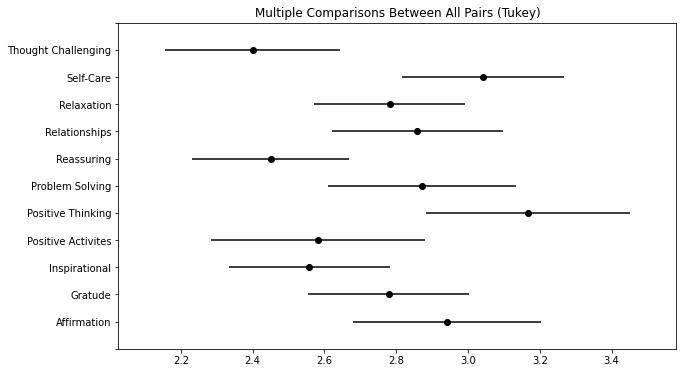

In [37]:

print(res2.plot_simultaneous())

# Step 4: Applying the Bonferroni Method (correction b)

Now another method we could use to correct for multiple comparisons and p-hacking is the Bonferroni Method, however it is known to be extremely strict in determining what is significant.

This method prompts us to change our alpha based on how many comparisons we've done.

alpha_new = alpha_old / number_of_comparisons

In [38]:
alpha_new = alpha/c
alpha_new

0.0009090909090909091

Now we use this as our new alpha and run the t-tests again. 

In [39]:
sig_results_bonferroni = {}
for key in ttest_results.keys():
  if ttest_results[key].pvalue < alpha_new:
    sig_results_bonferroni[key] = ttest_results[key]

sig_results_bonferroni

{'T-test for cat_0 and cat_3:': Ttest_indResult(statistic=-3.6422787120014197, pvalue=0.0004102747318991439),
 'T-test for cat_2 and cat_10:': Ttest_indResult(statistic=4.35406898516748, pvalue=2.2282641895366078e-05),
 'T-test for cat_2 and cat_5:': Ttest_indResult(statistic=4.174261741305193, pvalue=5.307245855106416e-05),
 'T-test for cat_2 and cat_6:': Ttest_indResult(statistic=3.517051569325298, pvalue=0.0005572873407030154),
 'T-test for cat_3 and cat_10:': Ttest_indResult(statistic=4.5958616081520125, pvalue=9.270751934484566e-06),
 'T-test for cat_3 and cat_5:': Ttest_indResult(statistic=4.464798342752365, pvalue=1.652279186903336e-05),
 'T-test for cat_3 and cat_6:': Ttest_indResult(statistic=3.867427895419464, pvalue=0.00016590374011750964),
 'T-test for cat_5 and cat_9:': Ttest_indResult(statistic=-3.4199313009142904, pvalue=0.0008251592225318857),
 'T-test for cat_9 and cat_10:': Ttest_indResult(statistic=3.482660656470396, pvalue=0.000632948551080597)}

In [40]:
# I got lazy and so to get the right labels just run the next tw cells a couple times till they all convertr xD

In [41]:
for old_key in sig_results_bonferroni.keys():
  key = ''+old_key
  key = key.replace('cat_1 ', categories[1])
  key = key.replace('cat_2', categories[2])
  key = key.replace('cat_3', categories[3])
  key = key.replace('cat_4', categories[4])
  key = key.replace('cat_5', categories[5])
  key = key.replace('cat_6', categories[6])
  key = key.replace('cat_7', categories[7])
  key = key.replace('cat_8', categories[8])
  key = key.replace('cat_9', categories[9])
  key = key.replace('cat_10', categories[10])
  key = key.replace('cat_0', categories[0])
  sig_results_bonferroni[key] = sig_results_bonferroni.pop(old_key)

In [42]:
sig_results_bonferroni

{'T-test for Affirmation and Reassuring:': Ttest_indResult(statistic=3.482660656470396, pvalue=0.000632948551080597),
 'T-test for Positive Activites and Positive Thinking:': Ttest_indResult(statistic=-3.6422787120014197, pvalue=0.0004102747318991439),
 'T-test for Positive Thinking and Inspirational:': Ttest_indResult(statistic=3.867427895419464, pvalue=0.00016590374011750964),
 'T-test for Positive Thinking and Reassuring:': Ttest_indResult(statistic=4.5958616081520125, pvalue=9.270751934484566e-06),
 'T-test for Positive Thinking and Thought Challenging:': Ttest_indResult(statistic=4.464798342752365, pvalue=1.652279186903336e-05),
 'T-test for Self-Care and Thought Challenging:': Ttest_indResult(statistic=4.174261741305193, pvalue=5.307245855106416e-05),
 'T-test for Thought Challenging and Affirmation:': Ttest_indResult(statistic=-3.4199313009142904, pvalue=0.0008251592225318857),
 'T-test for cat_2 and cat_10:': Ttest_indResult(statistic=4.35406898516748, pvalue=2.2282641895366078